# Exemplo de classificação com Árvores de Decisão

### Instalar módulos python necessários

In [ ]:
#!pip install pandas sklearn matplotlib

### Importar os módulos e funções necessários

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

### Carregar o conjunto de dados

##### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data
y = iris.target

In [4]:
pd.DataFrame(X, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Dividir os dados em treino (70%) e teste (30%)

##### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Criar uma Árvore de Decisão e treiná-la no conjunto de dados de treino

##### https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [6]:
dtree = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
dtree.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Visualizar a Árvore de Decisão

##### https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

[]

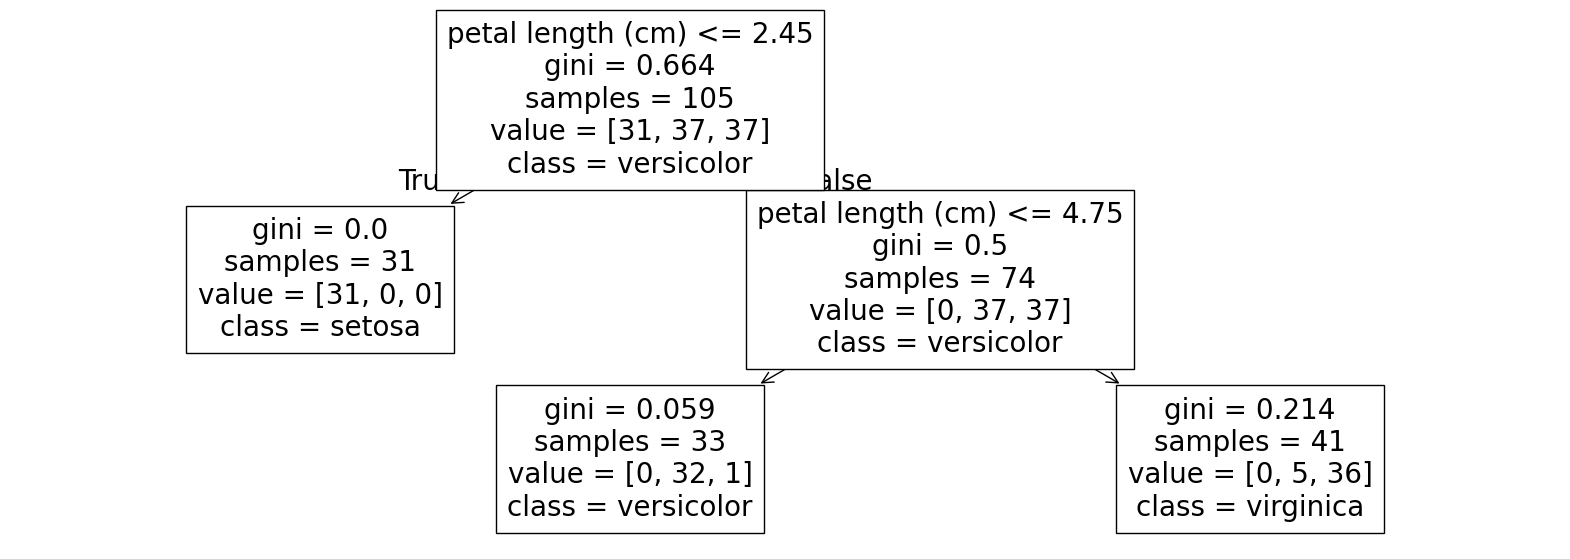

In [7]:
plt.figure(figsize=(20, 7))
tree.plot_tree(
    dtree, feature_names=iris.feature_names, class_names=iris.target_names
)
plt.plot()

### Realizar previsões no conjunto de dados de teste

In [8]:
pred = dtree.predict(X_teste)
pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

### Avaliar a qualidade das previsões

##### https://scikit-learn.org/stable/modules/model_evaluation.html

In [9]:
accuracy_score(y_teste, pred)

0.9777777777777777

In [10]:
print(classification_report(y_teste, pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

